Evaluating Logistic Model:
Accuracy: 54.2056
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.10      0.10      0.10        29
           2       0.08      0.02      0.03        54
           3       0.65      0.80      0.72       282
           4       0.06      0.04      0.05        45

    accuracy                           0.54       428
   macro avg       0.18      0.19      0.18       428
weighted avg       0.45      0.54      0.49       428



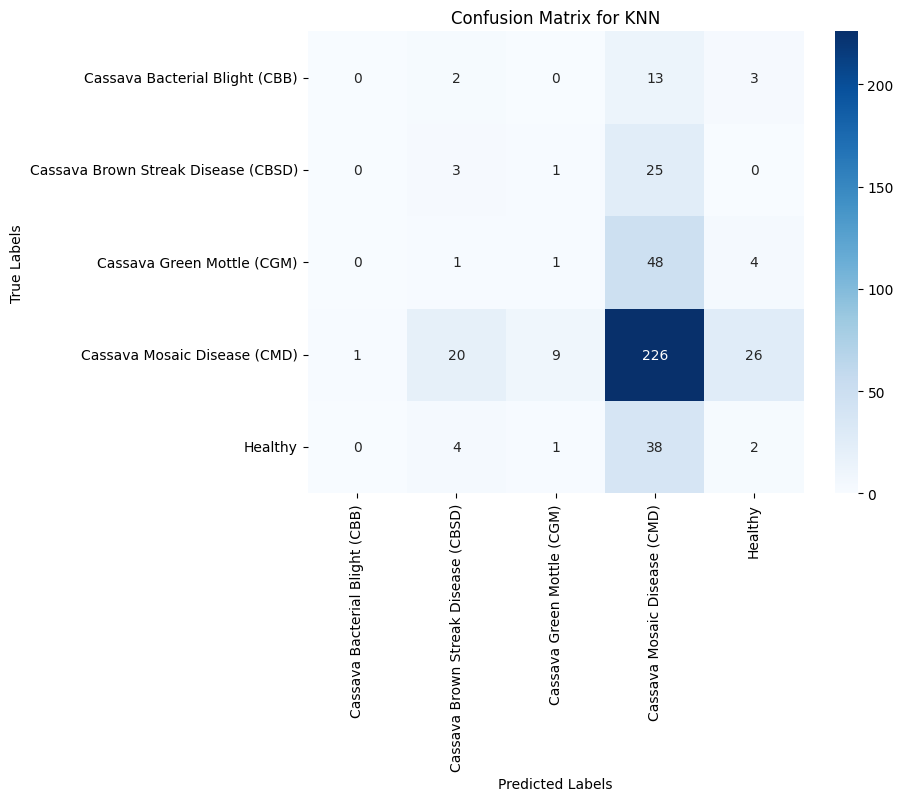


Evaluating Random Forest Model:
Accuracy: 65.8879%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        18
           1       1.00      0.03      0.07        29
           2       1.00      0.00      0.00        54
           3       0.66      1.00      0.79       282
           4       0.00      0.00      0.00        45

    accuracy                           0.66       428
   macro avg       0.73      0.21      0.17       428
weighted avg       0.67      0.66      0.53       428



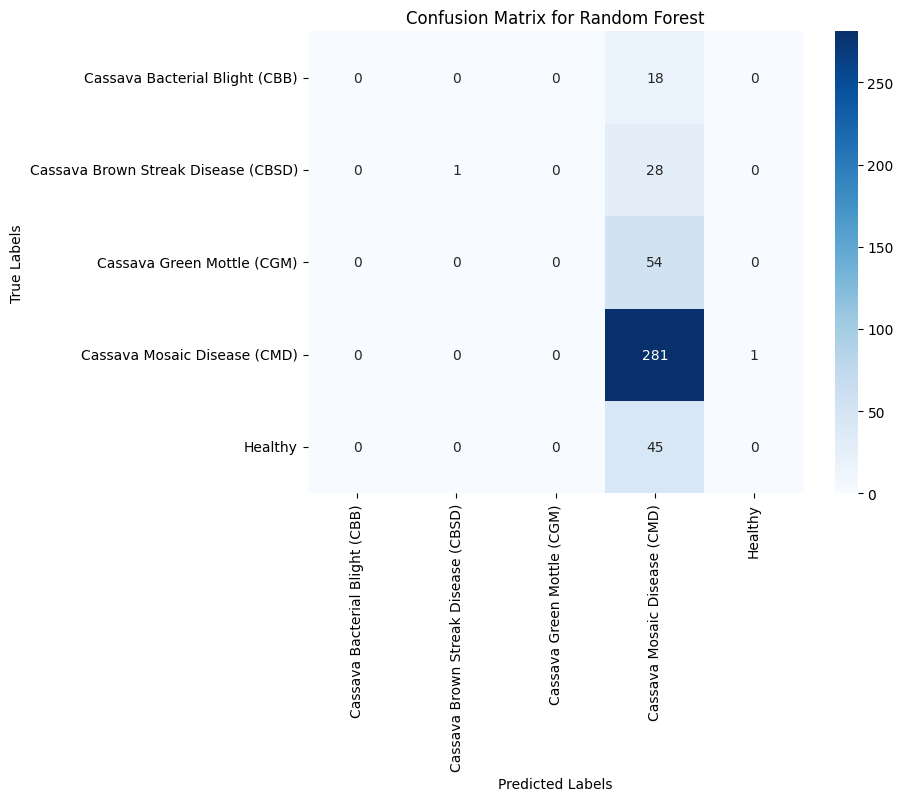


Predicted Disease for test image (./test_images/2216849948.jpg): Cassava Mosaic Disease (CMD)


In [29]:
import cv2
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('./train.csv')
with open('label_num_to_disease_map.json', 'r') as f:
    label_map = json.load(f)

# Use only a subset of the dataset (e.g., 10%)
subset_fraction = 0.1
df_subset = df.sample(frac=subset_fraction, random_state=42)

Img_size = 128  # Image size

# Construct full image paths
image_paths = [os.path.join('./train_images', img) for img in df_subset['image_id'].values]
labels = df_subset['label'].values

# Function to load and preprocess images
def load_images(image_paths, img_size=128):
    images = []
    valid_labels = []
    for img_path, label in zip(image_paths, labels):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Image not found: {img_path}")
            continue  # Skip missing images
        img = cv2.resize(img, (img_size, img_size))  # Resize
        img = img.flatten()  # Flatten into a 1D array
        images.append(img)
        valid_labels.append(label)  # Keep corresponding labels
    return np.array(images), np.array(valid_labels)

# Load training images
X, y = load_images(image_paths, Img_size)

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Train models
logreg = LogisticRegression(max_iter=1000, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
logreg.fit(X_train, y_train)
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.values(), yticklabels=label_map.values())
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

#Evaluate Logistic Model
y_pred_logreg = logreg.predict(X_test)
print("Evaluating Logistic Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg)*100:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg, zero_division=1))
plot_confusion_matrix(y_test, y_pred_logreg, "KNN")

# Evaluate KNN model
# y_pred_knn = knn.predict(X_test)
# print("Evaluating KNN Model:")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)*100:.4f}")
# print("Classification Report:")
# print(classification_report(y_test, y_pred_knn, zero_division=1))
# plot_confusion_matrix(y_test, y_pred_knn, "KNN")

# Evaluate Random Forest model
y_pred_rf = rf.predict(X_test)
print("\nEvaluating Random Forest Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)*100:.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=1))
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# --- TEST IMAGE PREDICTION ---
def predict_image(model, image_path, scaler, img_size=128):
    """ Preprocess and predict a single image """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Test image not found: {image_path}")
    img = cv2.resize(img, (img_size, img_size))
    img = img.flatten().reshape(1, -1)  # Reshape for model input
    img_scaled = scaler.transform(img)  # Apply the same scaling as training data
    prediction = model.predict(img_scaled)[0]  # Predict label
    disease_name = label_map[str(prediction)]  # Convert label to disease name
    return disease_name

# Predict on a new Cassava leaf image
test_img_path = './test_images/2216849948.jpg'
predicted_disease = predict_image(rf, test_img_path, scaler)
print(f"\nPredicted Disease for test image ({test_img_path}): {predicted_disease}")


True: 3 --> Predicted: 3
True: 3 --> Predicted: 3
True: 0 --> Predicted: 1
True: 3 --> Predicted: 3
True: 2 --> Predicted: 3
True: 3 --> Predicted: 3
True: 4 --> Predicted: 1
True: 3 --> Predicted: 3
True: 2 --> Predicted: 3
True: 2 --> Predicted: 3
True: 2 --> Predicted: 3
True: 1 --> Predicted: 3
True: 1 --> Predicted: 3
True: 1 --> Predicted: 3
True: 3 --> Predicted: 3
True: 1 --> Predicted: 3
True: 2 --> Predicted: 3
True: 3 --> Predicted: 3
True: 2 --> Predicted: 1
True: 1 --> Predicted: 3


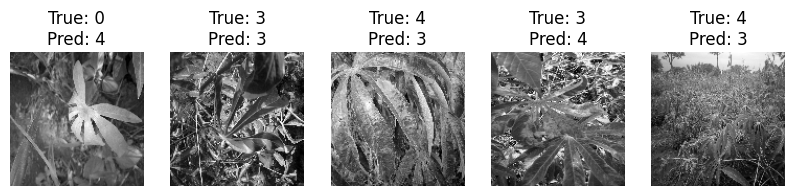

Predictions saved to 'logreg_model_predictions.csv'


In [35]:
# Compare true vs. predicted labels
for true_label, pred_label in zip(y_test[20:40], y_pred_logreg[20:40]):  # Change to y_pred_rf for Random Forest
    print(f"True: {true_label} --> Predicted: {pred_label}")


# Select random test samples
num_samples = 5
indices = np.random.choice(len(X_test), num_samples, replace=False)

plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    img = X_test[idx].reshape(128, 128)  # Reshape from 1D back to image
    true_label = y_test[idx]
    pred_label = y_pred_logreg[idx]  # Change to y_pred_rf for Random Forest
    
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"True: {true_label}\nPred: {pred_label}")

plt.show()


# Create DataFrame for results
df_results = pd.DataFrame({"True_Label": y_test, "Predicted_Label": y_pred_logreg})  # Change y_pred_knn as needed

# Save to CSV
df_results.to_csv("./model_pred/logreg_model_predictions.csv", index=False)
print("Predictions saved to 'logreg_model_predictions.csv'")

